<a href="https://colab.research.google.com/github/SeungHwan-Do/CJ_Remote_Internship/blob/main/0801/E3_3_%EB%8F%84%EC%8A%B9%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 설정

In [ ]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CSV파일을 읽어오기
drive_path = "/content/drive/MyDrive/"

train = pd.read_csv(drive_path + "dataset1.csv")

print(train.shape)

(1048575, 19)


# 데이터 살펴보기

### 데이터 구조

In [ ]:
# train 데이터프레임 내용 확인
train.head(3)

,STND_Y,IDV_ID,KEY_SEQ,SEX,AGE_GROUP,SIDO,RECU_FR_DT,FORM_CD,DSBJT_CD,MAIN_SICK,SUB_SICK,VSCN,RECN,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,DATA_STD_DT
0,2020,29,3724043,1,17,41,2020-12-21,3,1,I109,E785,1,1,0.15,11540,1500,10040,0,2021-12-28
1,2020,29,3495225,1,17,41,2020-12-14,3,1,I109,E785,1,1,0.15,11540,1500,10040,7,2021-12-28
2,2020,255,10615350,2,18,41,2020-04-20,3,1,I109,I251,1,1,0.15,11540,1500,10040,30,2021-12-28


In [ ]:
# train 데이터프레임 개요 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STND_Y           1048575 non-null  int64  
 1   IDV_ID           1048575 non-null  int64  
 2   KEY_SEQ          1048575 non-null  int64  
 3   SEX              1048575 non-null  int64  
 4   AGE_GROUP        1048575 non-null  int64  
 5   SIDO             1048575 non-null  int64  
 6   RECU_FR_DT       1048575 non-null  object 
 7   FORM_CD          1048575 non-null  int64  
 8   DSBJT_CD         1048575 non-null  int64  
 9   MAIN_SICK        1048575 non-null  object 
 10  SUB_SICK         1048575 non-null  object 
 11  VSCN             1048575 non-null  int64  
 12  RECN             1048575 non-null  int64  
 13  EDEC_ADD_RT      1048575 non-null  float64
 14  EDEC_TRAMT       1048575 non-null  int64  
 15  EDEC_SBRDN_AMT   1048575 non-null  int64  
 16  EDEC_JBRDN_AMT   1

In [ ]:
# train 데이터프레임 통계정보
train.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,STND_Y,IDV_ID,KEY_SEQ,SEX,AGE_GROUP,SIDO,RECU_FR_DT,FORM_CD,DSBJT_CD,MAIN_SICK,...,VSCN,RECN,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,DATA_STD_DT,month,season
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1048575,...,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,366,NaN,NaN,4169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-28 00:00:00,NaN,NaN,I109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-28,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,7005,NaN,NaN,141027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1048575,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-31 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2020.0,1.661755e+05,5.659551e+06,1.562559e+00,1.123280e+01,3.369546e+01,NaN,2.999735e+00,6.451292e+00,NaN,...,1.0,1.0,1.500000e-01,1.549178e+04,3.198712e+03,1.229186e+04,1.467077e+01,NaN,6.340186e+00,2.589259e+00
std,0.0,9.611398e+04,3.406616e+06,4.960712e-01,4.770835e+00,1.278442e+01,NaN,1.628041e-02,6.457953e+00,NaN,...,0.0,0.0,2.775559e-17,1.828412e+04,2.523003e+03,1.667087e+04,1.926278e+01,NaN,3.564714e+00,1.125482e+00
min,2020.0,2.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.100000e+01,NaN,2.000000e+00,0.000000e+00,NaN,...,1.0,1.0,1.500000e-01,1.530000e+03,0.000000e+00,3.000000e+01,0.000000e+00,NaN,1.000000e+00,1.000000e+00
25%,2020.0,8.318050e+04,2.617641e+06,1.000000e+00,8.000000e+00,2.700000e+01,NaN,3.000000e+00,1.000000e+00,NaN,...,1.0,1.0,1.500000e-01,1.154000e+04,1.500000e+03,9.620000e+03,3.000000e+00,NaN,3.000000e+00,2.000000e+00


### 결측값 확인

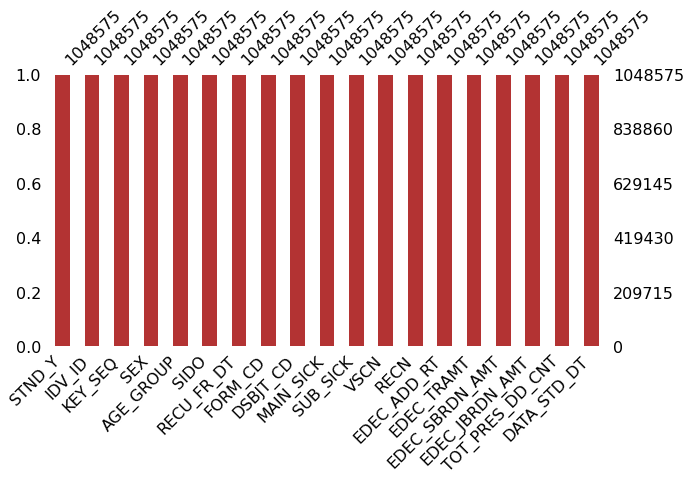

In [ ]:
# 결측값 분포
import missingno as msno
msno.bar(train, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

In [ ]:
# 중복 데이터 확인
train.duplicated().sum()

0

### 데이터 전처리

# 피처 엔지니어링
- 문자열, 범주형 변수를 포함
- 데이터 탐색(EDA) 및 전처리(pre-processing) 포함

In [ ]:
train['RECU_FR_DT'] = pd.to_datetime(train['RECU_FR_DT'])
train['month']=train['RECU_FR_DT'].dt.month
train['season'] = 'winter'
train.loc[train['month']<12, 'season']='fall'
train.loc[train['month']<9, 'season']='summer'
train.loc[train['month']<6, 'season']='spring'
train.loc[(train['month']==1)| (train['month']==2), 'season']='winter'

In [ ]:
df=train.loc[:,['SEX','AGE_GROUP','SIDO','MAIN_SICK','DSBJT_CD','EDEC_TRAMT','EDEC_SBRDN_AMT','EDEC_JBRDN_AMT','TOT_PRES_DD_CNT','season']]

In [ ]:
#df=df[train['MAIN_SICK'].str.contains('I109|J209|E119|J304|K210|L239|K219|J029|J0390|N400|J060|B351|J00|J303|N_|K297|F_|M170|M5456|M4806|J0190|K291|J040|J40|E785|J069|A099|L238|N185|A090|L500|L249|B353|J042|M511|J_|M179|L209|J329|J0100|K529|E782|J459|E039|J219|M171|S3350|L309|J320|N300')]
#df=df[train['MAIN_SICK'].str.contains('I109|J209|E119|J304|K210|L239|K219|J029|J0390|N400|J060|B351|J00|J303|N_|K297|F_|M170|M5456|M4806|J0190|K291|J040|J40|E785|J069|A099|L238|N185|A090')]
#df=df[train['MAIN_SICK'].str.contains('I109|J209|E119|J304|K210|L239|K219|J029|J0390|N400')]
df=df[train['MAIN_SICK'].str.contains('I109|J209|E119|J304|J029|J0390|N400|J303|M170|M4806|J060|J00|M5456|J0190|J069|A099|A090')]
df.loc[(df['MAIN_SICK']=='J029')|(df['MAIN_SICK']=='J0390')|(df['MAIN_SICK']=='J060')|(df['MAIN_SICK']=='J00')|(df['MAIN_SICK']=='J0190')|(df['MAIN_SICK']=='J069'),'MAIN_SICK']='cold'
df.loc[(df['MAIN_SICK']=='A099')| (df['MAIN_SICK']=='A090'), 'MAIN_SICK']='Gastroenteritis '
df.loc[(df['MAIN_SICK']=='J304')| (df['MAIN_SICK']=='J303'), 'MAIN_SICK']='rhinitis '

In [ ]:
df['MAIN_SICK']=df['MAIN_SICK'].astype('category').cat.codes
df['season']=df['season'].astype('category').cat.codes

In [ ]:
#정규화 스케일링
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df)

scaled = scaler.transform(df)
df_scaled = pd.DataFrame(data = scaled, columns=['SEX','AGE_GROUP','SIDO','MAIN_SICK','DSBJT_CD','EDEC_TRAMT','EDEC_SBRDN_AMT','EDEC_JBRDN_AMT','TOT_PRES_DD_CNT','season'])

In [ ]:
df_scaled

,SEX,AGE_GROUP,SIDO,MAIN_SICK,DSBJT_CD,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,season
0,-1.087947,1.156213,0.564871,-0.704720,-0.664358,-0.506256,-0.844408,-0.239029,-0.897342,1.202179
1,-1.087947,1.156213,0.564871,-0.704720,-0.664358,-0.506256,-0.844408,-0.239029,-0.573625,1.202179
2,0.919162,1.348160,0.564871,-0.704720,-0.664358,-0.506256,-0.844408,-0.239029,0.490014,-0.509146
3,0.919162,1.348160,0.564871,-0.704720,-0.664358,-0.506256,-0.844408,-0.239029,0.490014,-0.509146
4,0.919162,1.156213,0.564871,-0.704720,-0.664358,-0.506256,-0.844408,-0.239029,-0.897342,1.202179
...,...,...,...,...,...,...,...,...,...,...
412190,0.919162,0.772318,0.564871,1.404696,1.219218,0.431881,-0.787562,0.840697,-0.712361,1.202179
412191,-1.087947,0.772318,0.802326,1.404696,1.219218,0.431881,-0.787562,0.840697,-0.897342,0.346516
412192,-1.087947,0.772318,0.802326,1.404696,1.219218,0.431881,-0.787562,0.840697,-0.897342,0.346516
412193,-1.087947,0.964265,0.564871,1.053126,1.533147,0.431881,-0.787562,0.840697,-0.897342,-0.509146


In [ ]:
df

,SEX,AGE_GROUP,SIDO,MAIN_SICK,DSBJT_CD,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,season
0,1,17,41,2,1,11540,1500,10040,0,3
1,1,17,41,2,1,11540,1500,10040,7,3
2,2,18,41,2,1,11540,1500,10040,30,1
3,2,18,41,2,1,11540,1500,10040,30,1
4,2,17,41,2,1,11540,1500,10040,0,3
...,...,...,...,...,...,...,...,...,...,...
1048569,2,15,41,8,13,16140,1600,14540,4,3
1048570,1,15,44,8,13,16140,1600,14540,0,2
1048571,1,15,44,8,13,16140,1600,14540,0,2
1048573,1,16,41,7,15,16140,1600,14540,0,1


### 모델링

In [ ]:
#스케일링 없이 모델링
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score


#X_data = df.loc[:,['SEX','AGE_GROUP','DSBJT_CD']]
#y_data = df.loc[:,'MAIN_SICK']

#X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle = True, random_state=20)

#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

(329756, 3) (329756,)
(82439, 3) (82439,)


In [ ]:
#진료수 상위 10개만 가지고 모델링 (scaled)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#selected_features = ['SEX','AGE_GROUP','SIDO','DSBJT_CD','season']
selected_features = ['SEX','AGE_GROUP','SIDO','DSBJT_CD','season']
X_data = df_scaled.loc[:,selected_features]
y_data = df.loc[:,'MAIN_SICK']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle = True, random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(329756, 5) (329756,)
(82439, 5) (82439,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
y_knn_tr_pred = knn.predict(X_train)
knn_tr_acc = accuracy_score(y_train, y_knn_tr_pred)
print("Accuracy : %4f" %knn_tr_acc)

Accuracy : 0.559156


In [ ]:
y_knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_knn_pred)
print("Accuracy : %4f" %knn_acc)

Accuracy : 0.538701


In [ ]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#성능 평가
y_lrc_tr_pred = lrc.predict(X_train)
lrc_acc = accuracy_score(y_train, y_lrc_tr_pred)
print("Accuracy : %4f" %lrc_acc)

Accuracy : 0.483282


In [ ]:
#성능 평가
y_lrc_pred = lrc.predict(X_test)
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("Accuracy : %4f" %lrc_acc)

Accuracy : 0.482150


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier( random_state=20)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20)

In [ ]:
y_dtc_pred = dtc.predict(X_test)

dtc_acc = accuracy_score(y_test,y_dtc_pred)
print("Accuracy : %4f" %dtc_acc)

Accuracy : 0.563411


#### 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state = 20)
rfc.fit(X_train, y_train)
#예측
y_rfc_pred = rfc.predict(X_test)

#모델 성능 평가
rfc_acc = accuracy_score(y_test, y_rfc_pred)
print("Accuracy : %4f" %rfc_acc)

Accuracy : 0.562513


#### 피쳐 중요도

In [ ]:
# tree 계열 알고리즘의 feature importance 그래프
def plot_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = [features[i] for i in indices]
    feature_imp =  importances[indices]

    plt.figure(figsize=(10, 12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)),feature_imp, align='center')
    plt.yticks(range(len(indices)), feature_names)
    plt.xlabel('Relative Importance')

    print('피처: ', list(reversed(feature_names)))
    print('중요도: ', list(reversed(feature_imp)))

    return list(reversed(feature_names)), list(reversed(feature_imp))

피처:  ['AGE_GROUP', 'DSBJT_CD', 'SIDO', 'season', 'SEX']
중요도:  [0.39507979742330607, 0.39071343308639617, 0.1475942560507749, 0.04034672513605658, 0.02626578830346622]


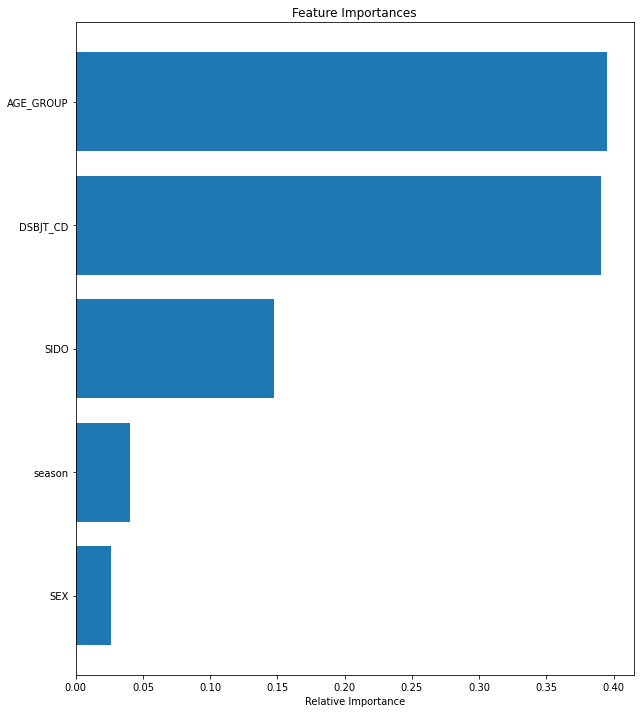

In [ ]:
imp_features, imp_scores = plot_importance(rfc, selected_features)

#### 부스팅

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=300, random_state=20)
xgbc.fit(X_train,y_train)
#예측
y_xgbc_pred = xgbc.predict(X_test)

xgbc_acc = accuracy_score(y_test, y_xgbc_pred)
print("Accuracy : %4f" %xgbc_acc)

Accuracy : 0.550916


#### Kfold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits=5, shuffle=True, random_state=20)
val_scores = []
num_fold = 1
for tr_idx, val_idx in kfold.split(X_train, y_train):
  X_tr, X_val = X_train.iloc[tr_idx, : ],X_train.iloc[val_idx, :]
  y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
  #학습
  rfc = RandomForestClassifier(random_state=20)
  rfc.fit(X_tr, y_tr)
  #검증
  y_val_pred = rfc.predict(X_val)
  val_acc = accuracy_score(y_val, y_val_pred)
  print("%d Fold Accuracy: %.4f"%(num_fold, val_acc))
  val_scores.append(val_acc)
  num_fold +=1

1 Fold Accuracy: 0.5627
2 Fold Accuracy: 0.5614
3 Fold Accuracy: 0.5622
4 Fold Accuracy: 0.5624
5 Fold Accuracy: 0.5623


# 시각화 및 분석







In [ ]:
train['MAIN_SICK'].value_counts().head(50)

I109     141027
J209      87358
E119      26401
J304      22956
K210      22853
L239      19240
K219      17310
J029      15078
J0390     15008
N400      12333
J060      12138
B351      12101
J00       12081
J303      11814
N_        11011
K297      10470
F_        10104
M170       9527
M5456      8892
M4806      8807
J0190      8352
K291       8146
J040       7785
J40        7756
E785       7482
J069       7153
A099       7062
L238       7031
N185       6537
A090       6208
L500       5093
L249       4838
B353       4699
J042       4609
M511       4545
J_         4532
M179       4432
L209       4351
J329       4257
J0100      4099
K529       4084
E782       3894
J459       3771
E039       3577
J219       3555
M171       3520
S3350      3495
L309       3473
J320       3452
N300       3439
Name: MAIN_SICK, dtype: int64

In [ ]:
#train['desease']=None
train.loc[(train['MAIN_SICK']>"H09")&(train['MAIN_SICK']<"H11"), 'desease']=train['MAIN_SICK']

In [ ]:
#train['cold']=0
train.loc[(train['MAIN_SICK']>="J00")&(train['MAIN_SICK']<"J07"), 'cold']=1

In [ ]:
train

,STND_Y,IDV_ID,KEY_SEQ,SEX,AGE_GROUP,SIDO,RECU_FR_DT,FORM_CD,DSBJT_CD,MAIN_SICK,...,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,DATA_STD_DT,month,season,desease,cold
0,2020,29,3724043,1,17,41,2020-12-21,3,1,I109,...,0.15,11540,1500,10040,0,2021-12-28,12,winter,NaN,NaN
1,2020,29,3495225,1,17,41,2020-12-14,3,1,I109,...,0.15,11540,1500,10040,7,2021-12-28,12,winter,NaN,NaN
2,2020,255,10615350,2,18,41,2020-04-20,3,1,I109,...,0.15,11540,1500,10040,30,2021-12-28,4,spring,NaN,NaN
3,2020,255,10616553,2,18,41,2020-04-16,3,1,I109,...,0.15,11540,1500,10040,30,2021-12-28,4,spring,NaN,NaN
4,2020,2406,3105303,2,17,41,2020-12-30,3,1,I109,...,0.15,11540,1500,10040,0,2021-12-28,12,winter,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2020,331155,10313767,1,15,44,2020-06-25,3,13,J029,...,0.15,16140,1600,14540,0,2021-12-28,6,summer,NaN,1.0
1048571,2020,331155,10313766,1,15,44,2020-06-24,3,13,J029,...,0.15,16140,1600,14540,0,2021-12-28,6,summer,NaN,1.0
1048572,2020,331415,7469843,2,16,41,2020-08-27,3,15,N3940,...,0.15,16140,1600,14540,7,2021-12-28,8,summer,NaN,NaN
1048573,2020,331726,10904243,1,16,41,2020-05-08,3,15,N400,...,0.15,16140,1600,14540,0,2021-12-28,5,spring,NaN,NaN


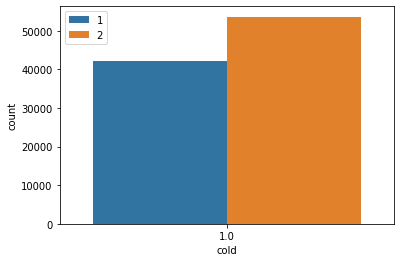

In [ ]:
#성별 감기 진료 분포
sns.countplot(x='cold', hue = 'SEX', data = train)
plt.legend(loc='best')

plt.show()

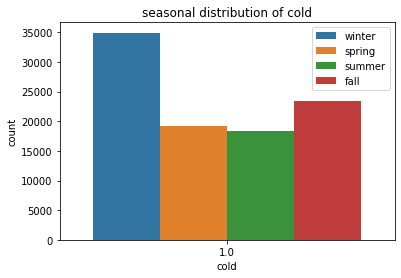

<Figure size 720x720 with 0 Axes>

In [ ]:
#계절별 감기 진료 분포
ax = sns.countplot(x = 'cold', hue = 'season', data=train)
plt.legend(loc='best')
plt.figure(figsize = [10.0,10.0])
ax.set_title('seasonal distribution of cold')

plt.show()

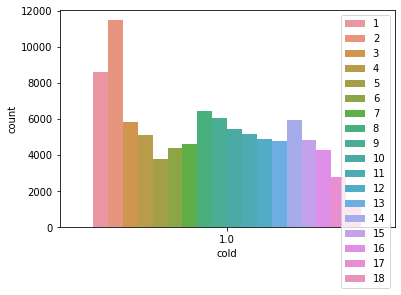

In [ ]:
#연령대별 감기 진료 분포
sns.countplot(x='cold', hue = 'AGE_GROUP', data = train)
plt.legend(loc='best')

plt.show()

In [ ]:
train.corr()

,STND_Y,IDV_ID,KEY_SEQ,SEX,AGE_GROUP,SIDO,FORM_CD,DSBJT_CD,VSCN,RECN,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,month,cold
STND_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IDV_ID,NaN,1.000000,-0.000710,0.007360,-0.002248,-0.008135,-0.008229,-0.000418,NaN,NaN,NaN,0.008285,0.012155,0.007271,0.000760,-0.001766,0.000621
KEY_SEQ,NaN,-0.000710,1.000000,0.001157,0.041256,0.003515,-0.006017,0.015068,NaN,NaN,NaN,0.011140,-0.006589,0.013205,0.035243,0.198461,-0.057520
SEX,NaN,0.007360,0.001157,1.000000,0.064268,-0.005938,-0.002315,-0.037223,NaN,NaN,NaN,-0.034004,-0.030719,-0.032595,-0.013911,-0.001985,-0.001304
AGE_GROUP,NaN,-0.002248,0.041256,0.064268,1.000000,0.026040,0.030778,-0.169632,NaN,NaN,NaN,0.021291,-0.321817,0.071993,0.292573,0.010832,-0.205122
SIDO,NaN,-0.008135,0.003515,-0.005938,0.026040,1.000000,-0.009057,0.000107,NaN,NaN,NaN,-0.003666,-0.018980,-0.001127,-0.006552,0.009097,-0.013005
FORM_CD,NaN,-0.008229,-0.006017,-0.002315,0.030778,-0.009057,1.000000,-0.036197,NaN,NaN,NaN,-0.142735,-0.066288,-0.146516,0.012387,-0.001338,0.005162
DSBJT_CD,NaN,-0.000418,0.015068,-0.037223,-0.169632,0.000107,-0.036197,1.000000,NaN,NaN,NaN,-0.032867,0.041350,-0.042308,-0.224793,0.004130,0.060425
VSCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RECN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


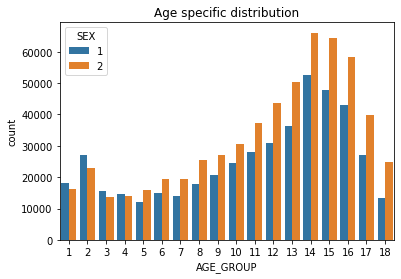

<Figure size 720x720 with 0 Axes>

In [ ]:
# 연령대별 단순 진료 분포
ax = sns.countplot(x='AGE_GROUP', hue='SEX',  data=train)
plt.figure(figsize = [10.0,10.0])
ax.set_title('Age specific distribution')

plt.show()

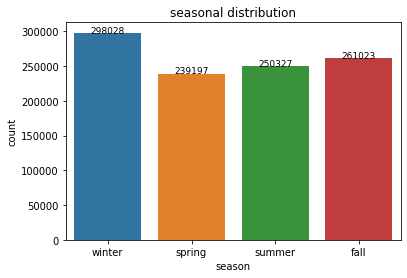

<Figure size 720x720 with 0 Axes>

In [ ]:
#계절별 단순 진료 분포
ax=sns.countplot(x = 'season', data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_title('seasonal distribution')

plt.figure(figsize = [10.0,10.0])
plt.show()

In [ ]:
dasp=train[train['season'].str.contains('spring')]
dasu=train[train['season'].str.contains('summer')]
dafa=train[train['season'].str.contains('fall')]
dawi=train[train['season'].str.contains('winter')]

In [ ]:
dasp['MAIN_SICK'].value_counts().head(10)

I109     34422
J209     16746
E119      6489
K210      5425
J304      4792
L239      4691
K219      4330
J0390     3039
N400      3004
J029      2983
Name: MAIN_SICK, dtype: int64

In [ ]:
dasu['MAIN_SICK'].value_counts().head(10)

I109     34836
J209     14600
E119      6534
L239      5745
K210      5520
J304      4155
K219      4105
B351      3807
J0390     3215
N400      3109
Name: MAIN_SICK, dtype: int64

In [ ]:
dafa['MAIN_SICK'].value_counts().head(10)

I109     35776
J209     19114
J304      7064
E119      6733
K210      5934
L239      4771
K219      4462
J029      3696
J303      3678
J0390     3626
Name: MAIN_SICK, dtype: int64

In [ ]:
dawi['MAIN_SICK'].value_counts().head(10)

J209     36898
I109     35993
J304      6945
E119      6645
K210      5974
J029      5432
J0390     5128
J00       4563
J060      4551
K219      4413
Name: MAIN_SICK, dtype: int64

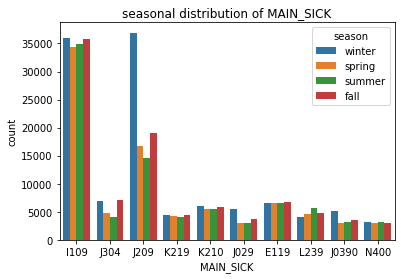

<Figure size 720x720 with 0 Axes>

In [ ]:
# 주요 질병 10개의 계절별 분포
#dai=train[train['MAIN_SICK'].str.contains('I109|J209|E119|J304|K210|L239|K219|J029|J0390|N400|J060|B351|J00|J303|N_|K297|F_|M170|M5456|M4806')]
dai=train[train['MAIN_SICK'].str.contains('I109|J209|E119|J304|K210|L239|K219|J029|J0390|N400')]
ax=sns.countplot(x = 'MAIN_SICK',hue = 'season', data=dai)
ax.set_title('seasonal distribution of MAIN_SICK')
plt.figure(figsize = [10.0,10.0])

plt.show()

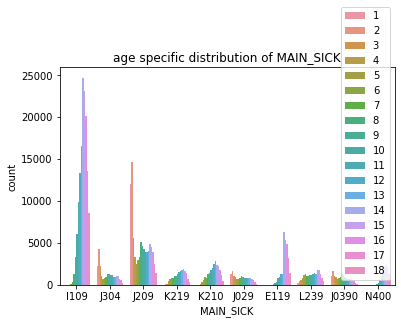

<Figure size 720x720 with 0 Axes>

In [ ]:
# 주요 질병 10 개의 연령별 분포
ax=sns.countplot(x = 'MAIN_SICK',hue = 'AGE_GROUP', data=dai)
plt.legend(loc='best')
ax.set_title('age specific distribution of MAIN_SICK')
plt.figure(figsize = [10.0,10.0])
plt.show()

In [ ]:
dai

,STND_Y,IDV_ID,KEY_SEQ,SEX,AGE_GROUP,SIDO,RECU_FR_DT,FORM_CD,DSBJT_CD,MAIN_SICK,...,VSCN,RECN,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,DATA_STD_DT,month,season
0,2020,29,3724043,1,80over,41,2020-12-21,3,1,I109,...,1,1,0.15,11540,1500,10040,0,2021-12-28,12,winter
1,2020,29,3495225,1,80over,41,2020-12-14,3,1,I109,...,1,1,0.15,11540,1500,10040,7,2021-12-28,12,winter
2,2020,255,10615350,2,80over,41,2020-04-20,3,1,I109,...,1,1,0.15,11540,1500,10040,30,2021-12-28,4,spring
3,2020,255,10616553,2,80over,41,2020-04-16,3,1,I109,...,1,1,0.15,11540,1500,10040,30,2021-12-28,4,spring
4,2020,2406,3105303,2,80over,41,2020-12-30,3,1,I109,...,1,1,0.15,11540,1500,10040,0,2021-12-28,12,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,2020,330771,3388022,2,70-79,41,2020-12-03,3,13,J029,...,1,1,0.15,16140,1600,14540,4,2021-12-28,12,winter
1048570,2020,331155,10313767,1,70-79,44,2020-06-25,3,13,J029,...,1,1,0.15,16140,1600,14540,0,2021-12-28,6,summer
1048571,2020,331155,10313766,1,70-79,44,2020-06-24,3,13,J029,...,1,1,0.15,16140,1600,14540,0,2021-12-28,6,summer
1048573,2020,331726,10904243,1,70-79,41,2020-05-08,3,15,N400,...,1,1,0.15,16140,1600,14540,0,2021-12-28,5,spring


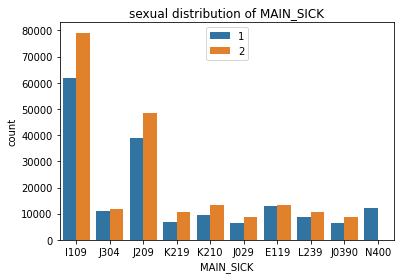

<Figure size 720x720 with 0 Axes>

In [ ]:
# 주요 질병 10 개의 성별 분포

ax=sns.countplot(x = 'MAIN_SICK',hue = 'SEX', data=dai)
plt.legend(loc='best')
ax.set_title('sexual distribution of MAIN_SICK')
plt.figure(figsize = [10.0,10.0])

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


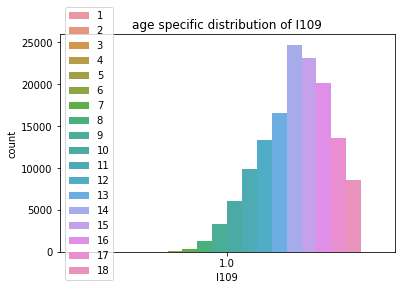

<Figure size 720x720 with 0 Axes>

In [ ]:
# 원발성 고혈압 연령별 분포
dai.loc[(dai['MAIN_SICK']=="I109"), 'I109']=1
ax=sns.countplot(x = 'I109',hue = 'AGE_GROUP', data=dai)
plt.legend(loc='center left')
ax.set_title('age specific distribution of I109')
plt.figure(figsize = [10.0,10.0])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


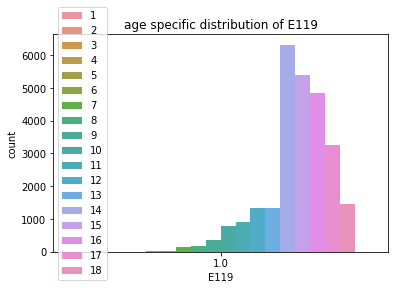

<Figure size 720x720 with 0 Axes>

In [ ]:
# 합병증동반x 2형당뇨병 연령별 분포
dai.loc[(dai['MAIN_SICK']=="E119"), 'E119']=1
ax=sns.countplot(x = 'E119',hue = 'AGE_GROUP', data=dai)
plt.legend(loc='center left')
ax.set_title('age specific distribution of E119')
plt.figure(figsize = [10.0,10.0])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


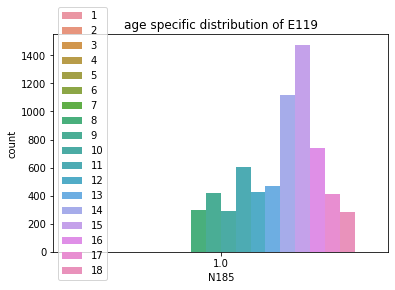

In [ ]:
# 만성 신장병 5기 연령별 분포
dai.loc[(dai['MAIN_SICK']=="N185"), 'N185']=1
ax=sns.countplot(x = 'N185',hue = 'AGE_GROUP', data=dai)
plt.legend(loc='center left')
ax.set_title('age specific distribution of E119')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


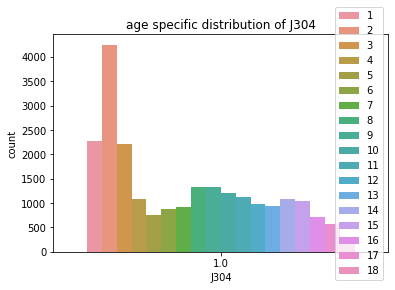

<Figure size 720x720 with 0 Axes>

In [ ]:
# 앨러지비염 연령별 분포
dai.loc[(dai['MAIN_SICK']=="J304"), 'J304']=1
ax=sns.countplot(x = 'J304',hue = 'AGE_GROUP', data=dai)
plt.legend(loc='center right')
ax.set_title('age specific distribution of J304')
plt.figure(figsize = [10.0,10.0])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


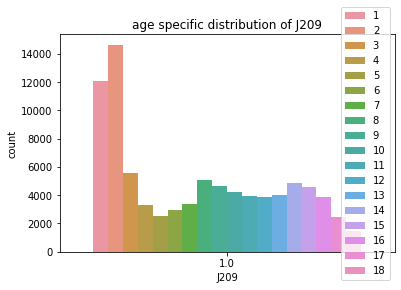

<Figure size 720x720 with 0 Axes>

In [ ]:
# 상세불명 급성 기관지염 연령별 분포
dai.loc[(dai['MAIN_SICK']=="J209"), 'J209']=1
ax=sns.countplot(x = 'J209',hue = 'AGE_GROUP', data=dai)
plt.legend(loc='center right')
ax.set_title('age specific distribution of J209')
plt.figure(figsize = [10.0,10.0])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


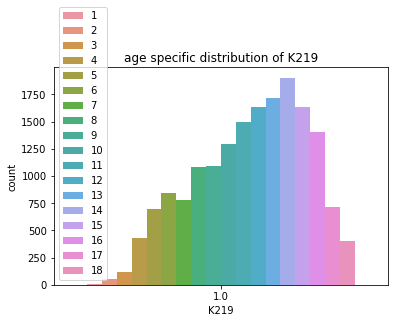

<Figure size 720x720 with 0 Axes>

In [ ]:
# 식도역류병 연령별 분포
dai.loc[(dai['MAIN_SICK']=="K219"), 'K219']=1
ax=sns.countplot(x = 'K219',hue = 'AGE_GROUP', data=dai)
plt.legend(loc='best')
ax.set_title('age specific distribution of K219')
plt.figure(figsize = [10.0,10.0])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


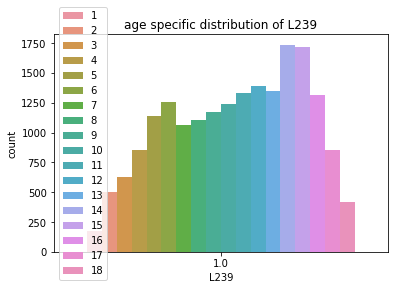

<Figure size 720x720 with 0 Axes>

In [ ]:
# 앨러지성 접촉피부염 연령별 분포
dai.loc[(dai['MAIN_SICK']=="L239"), 'L239']=1
ax=sns.countplot(x = 'L239',hue = 'AGE_GROUP', data=dai)
plt.legend(loc='center left')
ax.set_title('age specific distribution of L239')
plt.figure(figsize = [10.0,10.0])
plt.show()

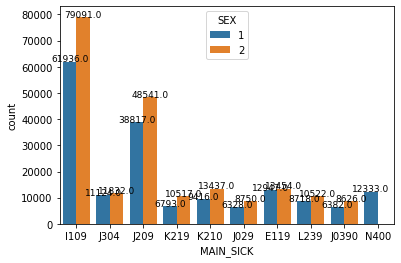

In [ ]:
# 주요 질병 10개의 성별 분포

ax=sns.countplot(x = 'MAIN_SICK',hue = 'SEX', data=dai)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

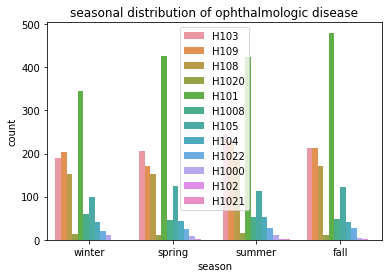

<Figure size 720x720 with 0 Axes>

In [ ]:
#계절별 안과질환 분포
ax = sns.countplot(x = 'season', hue = 'desease', data=train)
plt.legend(loc='best')
plt.figure(figsize = [10.0,10.0])
ax.set_title('seasonal distribution of ophthalmologic disease')
plt.show()

In [ ]:
#dai['I109']=0
#dai['J209']=0
#dai['E119']=0
#dai['J304']=0
#dai['K210']=0
#dai['L239']=0
#dai['K219']=0
#dai['J029']=0
#dai['J0390']=0
#dai['N400']=0
#dai['J060']=0
#dai['B351']=0
#dai['J00']=0
#dai['J303']=0
#dai['N_']=0
#dai['K297']=0
#dai['F_']=0
#dai['M170']=0
#dai['M5456']=0
#dai['M4806']=0

#dai.loc[(dai['MAIN_SICK']=="I109"), 'I109']=1
#dai.loc[(dai['MAIN_SICK']=="J209"), 'J209']=1
#dai.loc[(dai['MAIN_SICK']=="E119"), 'E119']=1
#dai.loc[(dai['MAIN_SICK']=="J304"), 'J304']=1
#dai.loc[(dai['MAIN_SICK']=="K210"), 'K210']=1
#dai.loc[(dai['MAIN_SICK']=="L239"), 'L239']=1
#dai.loc[(dai['MAIN_SICK']=="K219"), 'K219']=1
#dai.loc[(dai['MAIN_SICK']=="J029"), 'J029']=1
#dai.loc[(dai['MAIN_SICK']=="J0390"), 'J0390']=1
#dai.loc[(dai['MAIN_SICK']=="N400"), 'N400']=1
#dai.loc[(dai['MAIN_SICK']=="J060"), 'J060']=1
#dai.loc[(dai['MAIN_SICK']=="B351"), 'B351']=1
#dai.loc[(dai['MAIN_SICK']=="J00"), 'J00']=1
#dai.loc[(dai['MAIN_SICK']=="J303"), 'J303']=1
#dai.loc[(dai['MAIN_SICK']=="N_"), 'N_']=1
#dai.loc[(dai['MAIN_SICK']=="K297"), 'K297']=1
#dai.loc[(dai['MAIN_SICK']=="F_"), 'F_']=1
#dai.loc[(dai['MAIN_SICK']=="M170"), 'M170']=1
#dai.loc[(dai['MAIN_SICK']=="M5456"), 'M5456']=1
#dai.loc[(dai['MAIN_SICK']=="M4806"), 'M4806']=1
dac=train[train['MAIN_SICK'].str.contains('I109|J209|E119|J304|K210|L239|K219|J029|J0390|N400|J060|B351|J00|J303|N_|K297|F_|M170|M5456|M4806|J0190|K291|J040|J40|E785|J069|A099|L238|N185|A090')]
dac=pd.get_dummies(dac,prefix=None, columns=['MAIN_SICK'])

In [ ]:
dac.corr()

,STND_Y,IDV_ID,KEY_SEQ,SEX,AGE_GROUP,SIDO,FORM_CD,DSBJT_CD,VSCN,RECN,...,MAIN_SICK_K291,MAIN_SICK_K297,MAIN_SICK_L238,MAIN_SICK_L239,MAIN_SICK_M170,MAIN_SICK_M4806,MAIN_SICK_M5456,MAIN_SICK_N185,MAIN_SICK_N400,MAIN_SICK_N_
STND_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IDV_ID,NaN,1.000000,-0.002178,0.002351,-0.000460,-0.006234,NaN,0.002804,NaN,NaN,...,-0.001989,0.002941,-0.000148,-0.002406,-0.002846,-0.003278,-0.000500,0.012286,0.004180,0.003740
KEY_SEQ,NaN,-0.002178,1.000000,-0.002204,0.046935,0.005333,NaN,0.003858,NaN,NaN,...,0.007765,0.009905,0.021461,0.036857,0.020746,0.018306,0.014925,0.013374,0.014166,0.018854
SEX,NaN,0.002351,-0.002204,1.000000,0.059570,-0.002944,NaN,-0.036058,NaN,NaN,...,0.013821,0.017953,-0.001371,-0.003906,0.043974,0.023838,0.001083,-0.057039,-0.168322,0.105463
AGE_GROUP,NaN,-0.000460,0.046935,0.059570,1.000000,0.013066,NaN,-0.198073,NaN,NaN,...,-0.010995,-0.001858,-0.021213,-0.024429,0.103202,0.105955,0.083676,0.054740,0.102699,-0.043572
SIDO,NaN,-0.006234,0.005333,-0.002944,0.013066,1.000000,NaN,0.006294,NaN,NaN,...,-0.009540,-0.021282,-0.003618,-0.001042,0.013969,0.007585,0.046662,-0.009674,0.014027,-0.010264
FORM_CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DSBJT_CD,NaN,0.002804,0.003858,-0.036058,-0.198073,0.006294,NaN,1.000000,NaN,NaN,...,-0.056006,-0.057474,0.141247,0.235888,0.016447,0.010294,0.022992,-0.046552,0.201866,0.115424
VSCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RECN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
